<a href="https://colab.research.google.com/github/Rubnserrano/KAGGLE_-projects/blob/main/MNIST_Basic_Tensor_Flow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [62]:
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
! mkdir ~/.kaggle

In [4]:
! cp kaggle.json ~/.kaggle


In [5]:
! chmod 600 ~/.kaggle/kaggle.json

In [6]:
! kaggle competitions download digit-recognizer


 91% 14.0M/15.3M [00:00<00:00, 146MB/s]
100% 15.3M/15.3M [00:00<00:00, 150MB/s]


In [ ]:
!ls

digit-recognizer.zip  sample_data


In [7]:
!unzip digit-recognizer.zip

Archive:  digit-recognizer.zip
  inflating: sample_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


In [2]:
import pandas as pd
!ls
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
y_train = train['label'] 
X_train = train.drop('label', axis=1)
train.info()

digit-recognizer.zip  sample_data	     test.csv
kaggle.json	      sample_submission.csv  train.csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [5]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
X_test = test


In [6]:
X_train_tensor = tf.constant(X_train)
X_test_tensor = tf.constant(X_test)
y_train_tensor = tf.constant(y_train)

In [7]:
image_width = 28
image_height = 28
X_train_tensor = tf.reshape(X_train_tensor, [-1,image_width , image_height])
X_test_tensor = tf.reshape(X_test_tensor, [-1,image_width , image_height])
y_train_tensor = tf.Variable(y_train)

In [8]:
X_test_tensor.shape

TensorShape([28000, 28, 28])

[6, 2, 0]


<Figure size 360x360 with 0 Axes>

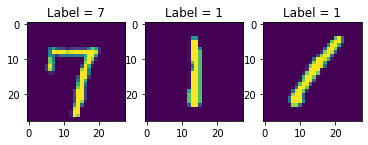

In [9]:
import random
plt.figure(figsize=(5,5))
def visualizacion(n=3,imgs=X_train_tensor, labels=y_train):
  plt.figure(figsize=(2*n,2*n))
  r_indexes=[]
  for i in range(n): r_indexes.append(random.randint(0,imgs.shape[1]))
  print(r_indexes)

  for j in range(n):
    plt.subplot(1,n,j+1) 
    plt.imshow(imgs[r_indexes[j],:].numpy().reshape((28,28)))
    plt.title(f'Label = {labels[r_indexes[j]]}')

visualizacion()

In [10]:
# X_train_tensor = tf.Variable(X_train)
# X_test_tensor = tf.Variable(test)
# X_train = tf.reshape(X_train_tensor, [-1,image_width , image_height])
# X_test = tf.reshape(X_test_tensor, [-1,image_width , image_height])
# y_train = tf.Variable(y_train)


In [11]:
X_train.shape, X_test.shape, y_train.shape
X_train = X_train_tensor.numpy()
X_test = X_test_tensor.numpy()
y_train = y_train_tensor.numpy()
X_train.shape, X_test.shape, y_train.shape

((42000, 28, 28), (28000, 28, 28), (42000,))

In [12]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (28,28)),
    tf.keras.layers.Dense(25, activation = 'relu'),
    tf.keras.layers.Dense(50, activation = 'relu'),
    tf.keras.layers.Dense(100, activation = 'relu'),
    tf.keras.layers.Dense(50, activation = 'relu'),
    tf.keras.layers.Dense(10, activation = 'softmax'),
])

model.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
                  optimizer = tf.keras.optimizers.Adam(),
                  metrics = ['accuracy']
)

model.summary()

model.fit(X_train, y_train, epochs=10)

Epoch 1/10
1313/1313 [==============================] - 5s 3ms/step - loss: 0.8534 - accuracy: 0.7727
Epoch 2/10
1313/1313 [==============================] - 5s 4ms/step - loss: 0.3207 - accuracy: 0.9083
Epoch 3/10
1313/1313 [==============================] - 5s 4ms/step - loss: 0.2499 - accuracy: 0.9290
Epoch 4/10
1313/1313 [==============================] - 5s 4ms/step - loss: 0.2130 - accuracy: 0.9384
Epoch 5/10
1313/1313 [==============================] - 8s 6ms/step - loss: 0.1940 - accuracy: 0.9436
Epoch 6/10
1313/1313 [==============================] - 7s 5ms/step - loss: 0.1705 - accuracy: 0.9503
Epoch 7/10
1313/1313 [==============================] - 11s 8ms/step - loss: 0.1566 - accuracy: 0.9534
Epoch 8/10
1313/1313 [==============================] - 10s 7ms/step - loss: 0.1438 - accuracy: 0.9572
Epoch 9/10
1313/1313 [==============================] - 5s 3ms/step - loss: 0.1339 - accuracy: 0.9610
Epoch 10/10
1313/1313 [==============================] - 5s 3ms/step - loss: 0.1

In [40]:
y_preds = model.predict(X_test)
train2 = pd.read_csv('train.csv')
test2 = pd.read_csv('test.csv')
sample_sub = pd.read_csv('sample_submission.csv')
predicciones = []
numbers = [0,1,2,3,4,5,6,7,8,9]
for i in range(X_test.shape[0]):
  predicciones.append(numbers[y_preds[i].argmax()])

# sample_sub['label'] = numbers[y_preds[].argmax()]
submission = pd.DataFrame({'ImageId': sample_sub.ImageId.to_list(),
                           'Label': predicciones})
submission

875/875 [==============================] - 2s 2ms/step


,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3
...,...,...
27995,27996,9
27996,27997,7
27997,27998,3
27998,27999,9


In [ ]:
PATH_ = 'C:\\Users\Cosas\OneDrive\Escritorio\Data_Science\mnist'
# submission.to_csv(index=False)
from google.colab import files
submission.to_csv('output.csv', index=False) 
files.download('output.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>